In [1]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a5/07/5bef9376c975ce23306d9217ab69ca94c07f2a3c90b17c03e3ae4db87170/plotly-5.15.0-py2.py3-none-any.whl.metadata
Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit-option-menu

Note: you may need to restart the kernel to use updated packages.


In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import re
import plotly.graph_objs as go
import textwrap




pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings("ignore")

In [314]:
synopsis = pd.read_csv('../Data/anime_with_synopsis.csv')
synopsis['Name'] = synopsis['Name'].apply(lambda x: x.replace(":"," "))
synopsis['Name'] = synopsis['Name'].apply(lambda x: x.replace("/"," "))


print(synopsis.shape)
synopsis.head()

(16214, 5)


,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [315]:
anime = pd.read_csv('../Data/anime.csv')    
anime['English name'] = anime['English name'].apply(lambda x: x.replace(":"," "))
anime['English name'] = anime['English name'].apply(lambda x: x.replace("/"," "))
print(anime.shape)
anime.head()

(17562, 35)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


## EDA

In [316]:
full_df = anime.merge(synopsis[['MAL_ID','sypnopsis']], on='MAL_ID', how='left')
# full_df = full_df[full_df['Score'] != 'Unknown']
full_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...


In [317]:
# if english name is not unknown, replacing the anime name with english name

full_df.loc[full_df['English name'] != 'Unknown', 'Name'] = full_df.loc[full_df['English name'] != 'Unknown', 'English name']


In [318]:
# full_df['Name'].to_csv('../Data/anime_names.csv', index=False)

In [319]:
full_df.describe(include='all') 

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
count,17562.000000,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562,16206
unique,NaN,17367,533,5034,6831,16679,7,201,11947,231,3783,231,1090,16,313,7,10490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3379,3645,4515,4933,4236,3288,2235,1506,1110,1084,15221
top,NaN,Rakshasa Street,Unknown,Hentai,Unknown,Unknown,TV,1,Unknown,Unknown,Unknown,Unknown,Unknown,Original,24 min. per ep.,PG-13 - Teens 13 or older,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Unknown,Unknown,2.0,Unknown,Unknown,Unknown,Unknown,Unknown,4.0,No synopsis information has been added to this...
freq,NaN,4,5141,969,10565,48,4996,8381,309,12817,7794,13616,7079,5215,1723,6132,1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936,3167,1371,610,511,584,977,1307,1597,955,709
mean,21477.192347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14900.093170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5953.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,22820.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35624.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
temp_df = full_df.loc[full_df['Score']!= "Unknown"]

In [334]:
temp_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop The Movie,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...
4,8,Beet the Vandel Buster,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...


In [321]:
temp_df['Score'] = temp_df['Score'].astype(float)

# temp_df.to_csv("../Data/Data_webapp.csv", index=False)

## Understanding the Type of Anime

Anime is a diverse medium with a variety of different types and formats. Here's what each of the categories you listed typically means:

***TV:*** This is the standard format for most anime. These are series that are aired on television. They can range anywhere from a few episodes to several hundred. Examples include "Naruto", "One Piece", and "Attack on Titan".

***Movie:*** As the name suggests, these are standalone anime movies or films related to an existing anime series. They tend to have higher production values than TV series due to the larger budgets typically associated with film production. Examples include "Spirited Away", "Your Name", and "Princess Mononoke".

***OVA*** (Original Video Animation): These are anime that are directly released to home video formats (like DVD or Blu-ray), without prior showings on television or in theaters. OVA episodes can be standalone stories, or they can serve as a continuation or side story for an existing anime series. OVAs often have higher production quality than TV series due to not being constrained by TV content restrictions or schedules.

***Special:*** These are extra episodes or movies that are not part of the main storyline. They often provide additional backstory, feature alternative plot lines, or simply provide more content for fans of the series. Specials can be released on TV, in theaters, or as OVAs.

***ONA*** (Original Net Animation): These are anime that are originally distributed through the Internet. The rise of online streaming platforms has made ONAs increasingly common in recent years. Examples include "The King's Avatar" and "Yamada's First Time: B Gata H Kei".

***Music:*** This isn't a format like the others, but rather a type of content. These anime are music videos or short animations that accompany a piece of music or a song. They can be standalone works, or they can be associated with an existing anime series.

Text(0.5, 1.0, 'Count of Anime by Type')

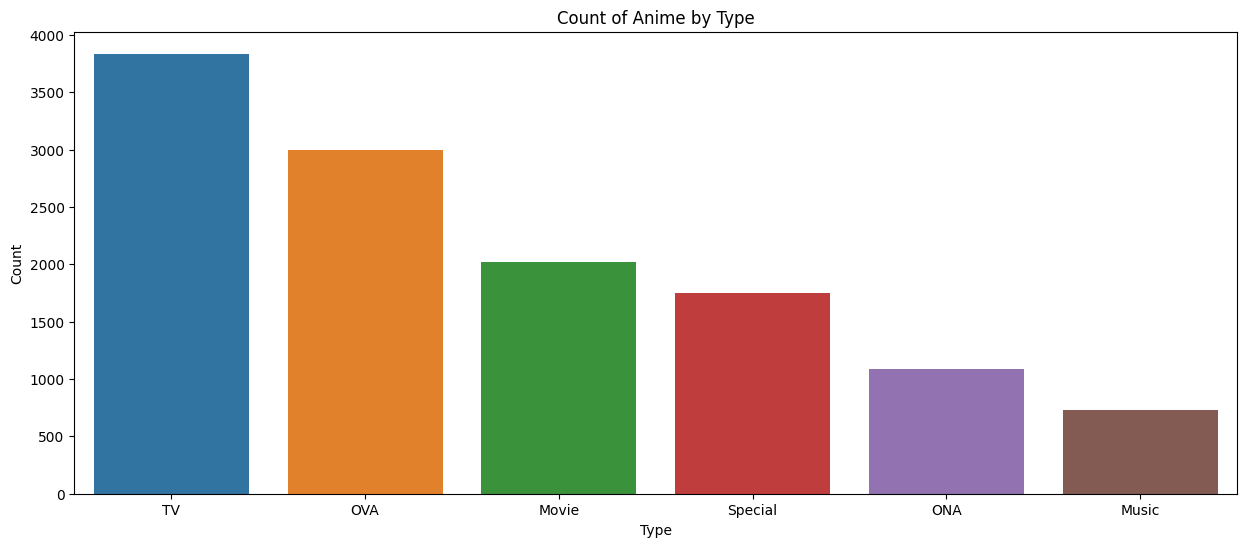

In [297]:
plt.figure(figsize=(15,6))
sns.countplot(x='Type', data=temp_df, order = temp_df['Type'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Anime by Type')

### Categorizing Type of Anime

for the sake of simplicity, we will categorize the type of anime into 4 categories:

1. TV (This includes Categories TV, OVA, and ONA)
2. Movie 
3. Special (This is separated from TV because sometimes it is not a part of main storyline and usually contains 1 or 2 episodes)
4. Music

In [298]:
anime_type_mapping = {"TV":"TV", "Movie":"Movie", "OVA":"TV", "Special":"Special", "ONA":"TV", "Music":"Music" }
temp_df['Type'] = temp_df['Type'].map(anime_type_mapping)
temp_df['Type'].value_counts()

Type
TV         7920
Movie      2017
Special    1754
Music       730
Name: count, dtype: int64

In [327]:
import plotly.io as pio
import plotly.express as px

from matplotlib import colors as mcolors


pio.templates.default = "simple_white"
fig = px.histogram(temp_df, x="Type", color="Type", 
                   nbins=len(temp_df['Type'].unique()), 
                   category_orders={'Type': temp_df['Type'].value_counts().index.tolist()},
                   template= "simple_white",
                #    color = "Type", 
                #    color_discrete_sequence=px.colors.qualitative.G10,
                   )

fig.update_layout(
    title_text='Type of Anime released', 
    xaxis_title_text='Type',
    yaxis_title_text='Count', 
    bargap=0.1, 
    barmode='relative'
)

fig.show()


In [300]:
temp_df['Type'].value_counts()  

Type
TV         7920
Movie      2017
Special    1754
Music       730
Name: count, dtype: int64

In [301]:
fig = px.histogram(temp_df, x="Score", color="Type", nbins=100,opacity = 0.6,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    title_text='Distribution of Rating by Type of Anime', 
    xaxis_title_text='Rating',
    yaxis_title_text='Count',
    barmode='overlay',  
    bargap=0.1,  
    bargroupgap=0.2  
)


fig.show()

In [302]:
from scipy.stats import gaussian_kde


# Assuming your dataframe is called 'df' and column with ratings is 'rating'
ratings = temp_df['Score']

# Histogram
trace1 = go.Histogram(
    x=ratings,
    histnorm='probability',
    opacity=0.75,
    name='Histogram',
    nbinsx=50,  # change to set the number of bins
    marker_color='#1f77b4',
)

# Calculate density
density = gaussian_kde(ratings)
xs = np.linspace(min(ratings), max(ratings), 200)
ys = density(xs)

# Density trace
trace2 = go.Scatter(
    x=xs,
    y=ys,
    mode='lines',
    name='KDE',
    line=dict(color='#FF2F0E'),
)

# Combine traces
data = [trace1, trace2]

# Layout
layout = go.Layout(
    title='Histogram and Density of Ratings',
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Density'),
    bargap=0.2,
    bargroupgap=0.1
)

# Figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()




In [303]:

import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd

# Assuming your dataframe is called 'df' and column with ratings is 'rating'
ratings = temp_df['Score']

# Histogram (normalized)
trace1 = go.Histogram(
    x=ratings,
    histnorm='probability density',  # changed to 'probability density'
    opacity=0.75,
    name='Histogram',
    nbinsx=50,  # change to set the number of bins
    marker_color='#1f77b4',
)

# Calculate density
density = gaussian_kde(ratings)
xs = np.linspace(min(ratings), max(ratings), 200)
ys = density(xs)

# Density trace
trace2 = go.Scatter(
    x=xs,
    y=ys,
    mode='lines',
    name='KDE',
    line=dict(color='#FF2F0E'),
)

# Combine traces
data = [trace1, trace2]

# Layout
layout = go.Layout(
    title='Distribution of Ratings',
    xaxis=dict(title='Rating', range = [3,9.5]),
    yaxis=dict(title='Density'),
    bargap=0.2,
    bargroupgap=0.1,
    width=800,   # Adjust the width here
    height=600
)

# Figure
fig = go.Figure(data=data, layout=layout)
fig.update_layout(showlegend=False)

# Show the plot
fig.show()


In [277]:
fig = px.box(temp_df, x="Type", y="Score", color="Type", color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    title_text='Distribution of Rating by Type of Anime',
    xaxis_title_text='Type',
    yaxis_title_text='Rating')
fig.show()


### Insights

1. Among the various forms of anime, TV series stand out as the most prevalent type, followed subsequently by Movies, Specials, and Music-themed anime.
2. TV series exhibit a narrower range of ratings as opposed to Movies, suggesting a more consistent quality. However, despite the broader range, Movies often secure higher ratings than their TV counterparts.
3. In general, Music-themed anime seem to garner the least favorable ratings, indicating they may be less well-received by the audience compared to other types of anime.

In [278]:
# from itertools import combinations
# from collections import Counter

# # Create a Counter to hold our co-occurrences
# co_occurrences = Counter()

# # Go through each row in the dataframe
# for _, row in temp_df.iterrows():
#     # Generate all combinations of genres for this row
#     for combo in combinations(row['Genres'].split(", "), 2):
#         # We want to count 'Action', 'Drama' the same as 'Drama', 'Action'
#         # So we need to sort the pair before we add it to the Counter
#         co_occurrences[tuple(sorted(combo))] += 1

# # Now we create our final DataFrame
# genre_connection = pd.DataFrame([(genre1, genre2, count) for (genre1, genre2), count in co_occurrences.items()],
#                         columns=['Genre-1', 'Genre-2', 'Count'])




# import networkx as nx
# import hvplot.networkx as hvnx
# import holoviews as hv
# import colorcet as cc

# # Assuming the data is in a pandas DataFrame called df
# G = nx.from_pandas_edgelist(genre_connection, 'Genre-1', 'Genre-2', 'Count')

# # Create a layout for nodes
# layout = nx.spring_layout(G, k=0.1)

# # Get unique genres and assign colors
# genres = pd.concat([genre_connection['Genre-1'], genre_connection['Genre-2']]).unique()
# colors = cc.glasbey_dark[:len(genres)]
# color_dict = dict(zip(genres, colors))

# # Add node attributes for colors
# nx.set_node_attributes(G, {node: color_dict.get(node, 'black') for node in G.nodes()}, 'color')

# # Create a graph
# graph = hvnx.draw(G, pos=layout, node_size=100, node_color='color', 
#                   edge_color='Count', edge_cmap='viridis', edge_line_width=hv.dim('Count')*0.01, 
#                   labels='index', label_font_size=8, padding=0.1)

# # If you want to add hover information
# graph.opts(tools=['hover'], show_frame=False, width=800, height=600)

# hv.extension('bokeh')
# graph


In [279]:
# Split the genres column into multiple genres
splitted_genres = temp_df['Genres'].str.split(', ', expand=True)

# Stack all the genres into a single column
stacked_genres = splitted_genres.stack()

# Count the occurrences of each genre
genre_counts = pd.DataFrame({"Genre":stacked_genres.value_counts().index, "Count":stacked_genres.value_counts().values})

genre_counts['Percentage'] = np.round(genre_counts['Count'].apply(lambda count: (count/genre_counts['Count'].sum())*100),2)



In [331]:
order = genre_counts['Genre'].values.tolist()

In [280]:
fig = px.bar(genre_counts, x="Genre", y="Count", color="Genre", color_discrete_sequence=px.colors.qualitative.G10, opacity=0.8, hover_data=['Percentage'])
fig.update_xaxes(tickangle=270)
fig.update_layout(showlegend=False, title_text='Popular Genre for Anime', xaxis_title_text='Genre', yaxis_title_text='Count')


fig.show()


In [281]:
genre_order = genre_counts['Genre'].tolist()
genre_order

new_df = temp_df.copy(deep=True)
new_df['Genres'] = new_df['Genres'].apply(lambda x: x.split(', '))  # Convert genre strings to lists
exploded_df = new_df.explode('Genres')

fig = px.box(exploded_df, x='Genres', y='Score', color='Genres', color_discrete_sequence=px.colors.qualitative.G10, category_orders={'Genres': genre_order})
fig.update_xaxes(tickangle=270)
fig.update_layout(showlegend=False, title_text='Distribution of Rating by Genre', xaxis_title_text='Genre', yaxis_title_text='Rating')
fig.show()

In [282]:
exploded_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
0,1,Cowboy Bebop,8.78,Action,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
0,1,Cowboy Bebop,8.78,Adventure,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
0,1,Cowboy Bebop,8.78,Comedy,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
0,1,Cowboy Bebop,8.78,Drama,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
0,1,Cowboy Bebop,8.78,Sci-Fi,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."


In [283]:
only_front_end_anime_df = pd.read_csv("../Data/only_front_end_anime.csv")
only_front_end_anime = only_front_end_anime_df.iloc[:,0].values.tolist()

In [284]:
genre_list = ['Comedy', 'Action', 'Fantasy', 'Adventure', 'Sci-Fi','Sports','Horror','Historical','Romance','School']
genre_wise_anime = {}
for genre in genre_list:
    temp_df = exploded_df[exploded_df['Genres'] == genre]
    temp_df = temp_df[temp_df['Name'].isin(only_front_end_anime)]
    temp_df.sort_values(by = 'Members', ascending= False, inplace=True)
    anime_list = list(temp_df['Name'][:15])
    genre_wise_anime[genre] = anime_list

In [286]:
anime_to_download = []
for genre in genre_wise_anime:
    for anime in genre_wise_anime[genre]:
        if anime not in anime_to_download:
            anime_to_download.append(anime)

In [234]:
import os
path = "../src/anime_images/"
downloaded_anime_images = os.listdir(path)
cleaned_downloaded_anime_images = [anime_image.split('.')[0].replace('_', ' ') for anime_image in downloaded_anime_images]

In [ ]:
anime_to_download_2 = []


In [216]:
# pd.DataFrame({'Name':anime_to_download}).to_csv("../Data/first_anime_thumbnails_list.csv",index=False)

In [187]:
"KonoSuba God's Blessing on This Wonderful World!" in anime_to_download

True

In [332]:
genres_rating = exploded_df.groupby('Genres')['Score'].mean()
genres_rating_df = pd.DataFrame({'Genre':genres_rating.index, 'Average Rating':genres_rating.values})

fig = px.line(genres_rating_df, x='Genre', y='Average Rating',category_orders= order)
fig.update_xaxes(tickangle=270)
fig.update_layout(title_text='Average Rating by Genre', xaxis_title_text='Genre', yaxis_title_text='Average Rating')
fig.show()

### Observations

1. The dataset includes 43 distinct genres, with each anime potentially classified under multiple genres.
2. Comedy is the most prevalent genre, appearing in more than 4,500 anime titles. This is followed by the genres of Action and Fantasy, then Adventure.
3. Regardless of the genre, the ratings for most anime titles tend to range from 5 to 9, with an average rating of approximately 6.64 across all titles.
4. Among all the genres, Thriller boasts the highest average rating at 7.12, followed closely by Mystery. On the other hand, Dementia genre exhibits the lowest average rating, standing at 5.26.

In [342]:
def extract_year(text):
    match = re.search(r'\d{4}', text)
    if match:
        return match.group()
    return np.nan

In [343]:
# Assuming the column with the dates is named 'Date'
temp_df['Aired_Year'] = temp_df['Aired'].apply(extract_year)
temp_df.dropna(subset=['Aired_Year'], inplace=True)

# Convert the extracted Year to numeric
temp_df['Aired_Year'] = temp_df['Aired_Year'].astype(int)
temp_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Aired_Year
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever...",1998
1,5,Cowboy Bebop The Movie,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ...",2001
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0...",1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002
4,8,Beet the Vandel Buster,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...,2004


In [344]:
vc = temp_df['Aired_Year'].value_counts().sort_index()
anime_year = pd.DataFrame({"Aired_Year":vc.index, "Count":vc.values})

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=anime_year['Aired_Year'], 
        y=anime_year['Count'], 
        mode='lines',
        line=dict(color='#4E79A7'), 
    )
)

fig.update_layout(
    title='Number of Anime Released per Year',
    xaxis_title='Year',
    yaxis_title='Number of Anime',
)

fig.show()

In [350]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Here we assume your data is in a dataframe called 'df'

# Split the genres by comma into a list (replace ',' with your actual separator if different)
new_df = temp_df.copy(deep=True)
new_df['Genres'] = new_df['Genres'].str.split(',')

# Explode the dataframe on the 'Genres' column
df_exploded = new_df.explode('Genres')

# Now groupby 'Year' and 'Genres', count the movies, reset index, and pivot the dataframe
pivot_df = df_exploded.groupby(['Aired_Year', 'Genres']).count().reset_index().pivot(index='Aired_Year', columns='Genres', values='Name').fillna(0)

# The list of all genres
all_genres = pivot_df.columns.tolist()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(" "),
    dcc.Dropdown(
        id='genres-dropdown',
        options=[{'label': i, 'value': i} for i in all_genres],
        value=['Adventure', 'Fantasy'],  # default values
        multi=True
    ),
    dcc.Graph(id='graph-output')
])

@app.callback(
    Output('graph-output', 'figure'),
    [Input('genres-dropdown', 'value')])
def update_figure(selected_genres):
    traces = []
    for genre in selected_genres:
        traces.append(go.Scatter(
            x=pivot_df.index, 
            y=pivot_df[genre],
            mode='lines',
            name=genre
        ))
    return {'data': traces,
            'layout': go.Layout(title='Anime Released by genre over years',
                                xaxis={'title': 'Year'},
                                yaxis={'title': '# Anime'})}

if __name__ == '__main__':
    app.run_server(debug=False)

In [352]:
df_grouped = np.round(temp_df.groupby('Aired_Year')['Score'].mean(),2)

fig = go.Figure()

# Add line to the figure
fig.add_trace(go.Scatter(
    x=df_grouped.index, 
    y=df_grouped.values,  
    mode='lines', 
    name='Average Rating',
    line=dict(color="#4E79A7")
))

fig.update_layout(
    title='Average Rating over the years',
    xaxis_title='Year',
    yaxis_title='Average Rating'
)

fig.show()


In [353]:
top_movies = temp_df[['Name','Score']].sort_values(by='Score', ascending=False).head(10)

top_movies['Name'] = ['<br>'.join(textwrap.wrap(i, 15, break_long_words=False)) for i in top_movies['Name']]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(top_movies, x='Name', y='Score', color='Name', color_discrete_sequence=colors)

fig.update_layout(showlegend=False, title_text='Top 10 Anime by Rating', xaxis_title_text='Anime', yaxis_title_text='Rating')

for xi, yi in zip(top_movies['Name'], top_movies['Score']):
    fig.add_annotation(x=xi, y=yi,
        text=str(yi),
        showarrow=False,
        font=dict(
            size=12,
            color='Black'
        ),
        align='center',
        ax=0,
        ay=-yi,
        yshift=10
    )

fig.update_xaxes(tickangle=0, tickfont=dict(size=10)) 

fig.show()


In [354]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

In [355]:
top_movies = temp_df[['Name','Score']].sort_values(by='Score', ascending=False).head(30)
top_movies['Name'].values

array(['Fullmetal Alchemist Brotherhood', 'Attack on Titan Final Season',
       'Steins;Gate', 'Hunter x Hunter',
       'Attack on Titan Season 3 Part 2', 'Gintama Season 4',
       'Gintama Season 2', 'Legend of the Galactic Heroes',
       'Gintama Enchousen', 'March Comes In Like A Lion 2nd Season',
       'A Silent Voice', 'Gintama Season 5', 'Gintama',
       'Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare',
       'Clannad ~After Story~', 'Your Name.',
       'Owarimonogatari Second Season',
       'Code Geass Lelouch of the Rebellion R2', 'Gintama: The Final',
       'Haikyu!! 3rd Season',
       'Gintama. Silver Soul Arc - Second Half War', 'Mob Psycho 100 II',
       'Spirited Away', 'Kizumonogatari III: Reiketsu-hen',
       'Gintama. Silver Soul Arc',
       'Descending Stories Showa Genroku Rakugo Shinju',
       "Fate stay night Heaven's Feel - III. Spring Song",
       'Monogatari Series Second Season', 'Cowboy Bebop',
       'Mushishi Zoku Shou 2nd Season'], dty

In [357]:
top_movies = temp_df[['Name','Members']].sort_values(by='Members', ascending=False).head(10)

top_movies['Name'] = ['<br>'.join(textwrap.wrap(i, 15, break_long_words=False)) for i in top_movies['Name']]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(top_movies, x='Name', y='Members', color='Name', color_discrete_sequence=colors)

fig.update_layout(showlegend=False, title_text='Top 10 Anime with biggest community', xaxis_title_text='Anime', yaxis_title_text='Members')

for xi, yi in zip(top_movies['Name'], top_movies['Members']):
    fig.add_annotation(x=xi, y=yi,
        text=human_format(yi),
        showarrow=False,
        font=dict(
            size=12,
            color='Black'
        ),
        align='center',
        ax=0,
        ay=-yi,
        yshift=10
    )

fig.update_xaxes(tickangle=0, tickfont=dict(size=10)) 

fig.show()

In [358]:
new_df = temp_df.copy(deep=True)
new_df = new_df[new_df['Episodes']!= 'Unknown']
new_df = new_df[new_df['Duration']!= 'Unknown']
new_df['Episodes'] = new_df['Episodes'].astype(int)

In [359]:
def convert_to_minutes(time_string):
    time_string = time_string.split('per')[0]
    time_string = time_string.strip()  # remove white spaces
    if time_string == 'Unknown':
        return time_string  # if time is unknown, return it as it is
    time_split = time_string.split('.')  # split by "."
    total_minutes = 0
    for t in time_split:
        t = t.strip()  # remove white spaces
        if 'hr' in t:
            total_minutes += int(t.replace('hr', '').strip()) * 60  # convert hours to minutes
        elif 'min' in t:
            total_minutes += int(t.replace('min', '').strip())  # keep minutes as it is
        elif 'sec' in t:
            total_minutes += int(t.replace('sec', '').strip()) / 60  # convert seconds to minutes
    return total_minutes


In [360]:
new_df['Duration'] = new_df['Duration'].apply(convert_to_minutes)
new_df['Total_Duration'] = new_df['Duration'] * new_df['Episodes']
new_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Aired_Year,Total_Duration
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever...",1998,624.0
1,5,Cowboy Bebop The Movie,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,115.0,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ...",2001,115.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0...",1998,624.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002,650.0
4,8,Beet the Vandel Buster,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23.0,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...,2004,1196.0


In [361]:
from scipy.stats import gaussian_kde


kde_dict = {}
range_dict = {}
for t in new_df['Type'].unique():
    df_type = new_df[new_df['Type'] == t]
    # Ensure 'Duration' column is numeric for KDE calculation
    df_type['Total_Duration'] = pd.to_numeric(df_type['Total_Duration'], errors='coerce') / 60  
    kde = gaussian_kde(df_type['Total_Duration'].dropna())
    kde_dict[t] = kde
    range_dict[t] = (df_type['Total_Duration'].min(), min(df_type['Total_Duration'].max(), 1500/60)) 

# The list of all types
all_types = list(kde_dict.keys())

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(""),
    dcc.Dropdown(
        id='types-dropdown',
        options=[{'label': i, 'value': i} for i in all_types],
        value=all_types,  # default values
        multi=True
    ),
    dcc.Graph(id='graph-output')
])

@app.callback(
    Output('graph-output', 'figure'),
    [Input('types-dropdown', 'value')])
def update_figure(selected_types):
    traces = []
    x_range = []
    for t in selected_types:
        x = np.linspace(*range_dict[t], 1000)
        y = kde_dict[t](x)
        traces.append(go.Scatter(
            x=x, 
            y=y,
            mode='lines',
            name=t
        ))
        x_range.append(range_dict[t])

    x_range = (min([r[0] for r in x_range]), max([r[1] for r in x_range]))

    return {'data': traces,
            'layout': go.Layout(title='Distribution of Anime Run Time by Type',
                                xaxis={'title': 'Total Duration (Hours)', 'range': x_range},
                                yaxis={'title': 'Density'})}

if __name__ == '__main__':
    app.run_server(debug=False)


[2023-07-18 19:03:41,114] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\PC\OneDrive\Desktop\Projects\Anime\anime_env\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\OneDrive\Desktop\Projects\Anime\anime_env\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\OneDrive\Desktop\Projects\Anime\anime_env\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\OneDrive\Desktop\Projects\Anime\anime_env\Lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [362]:
pivot_df = new_df.groupby(['Aired_Year', 'Type'])['Total_Duration'].sum().div(60).reset_index().pivot(index='Aired_Year', columns='Type', values='Total_Duration').fillna(0)

all_types = pivot_df.columns.tolist()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(""),
    dcc.Dropdown(
        id='types-dropdown',
        options=[{'label': i, 'value': i} for i in all_types],
        value=all_types,  # default values
        multi=True
    ),
    dcc.Graph(id='graph-output')
])

@app.callback(
    Output('graph-output', 'figure'),
    [Input('types-dropdown', 'value')])
def update_figure(selected_types):
    traces = []
    for t in selected_types:
        traces.append(go.Scatter(
            x=pivot_df.index, 
            y=pivot_df[t],
            mode='lines',
            name=t
        ))
    return {'data': traces,
            'layout': go.Layout(title='Total Duration of Anime released over the years by Type',
                                xaxis={'title': 'Year'},
                                yaxis={'title': 'Total Duration (in hours)'})}

if __name__ == '__main__':
    app.run_server(debug=False)


In [336]:
def get_google_search_url(anime_name):
    base_url = "https://www.google.com/search?q="
    search_query = anime_name.replace(' ', '+') + "+watch+online"
    return base_url + search_query

anime_name = 'One Piece' # replace with the anime name you want to search
print(get_google_search_url(anime_name))


https://www.google.com/search?q=One+Piece+watch+online
